#Tarea 10.3

Resuelva el siguiente problema de valor inicial usando el método de Euler y los métodos de Taylor de orden 2 y 3

$$
y'(t) = \frac{\cos(t)}{\sin(y(t))}\,,\quad y(0) = 1\,,\quad 0 \leq t \leq 1
$$

Resuelva la ecuación analíticamente y grafique en función de $h$ el error cometido con los tres métodos para $t = 1$. ¿Es compatible con lo esperado? ¿Por qué?

In [291]:
import matplotlib.pyplot as plt
import numpy as np


Serán necesarias las primeras tres derivadas para encontrar la solución. Además de la solución exacta para obtener el error.

Segunda derivada:
$$
y''(t)=  -\frac{\sin\left(t\right)\sin\left(\operatorname{y}\left(t\right)\right)+\operatorname{y}'\left(t\right)\cos\left(t\right)\cos\left(\operatorname{y}\left(t\right)\right)}{\sin^2\left(\operatorname{y}\left(t\right)\right)} =
  y''(t) = \cos^{-1}(t)(\sin(t) + \cos(t)y'(t)\tan^{-1}(y))
$$
Tercera derivada: $$
 y'''(t) = \dfrac{\left(\left(\operatorname{y}'\left(t\right)\right)^2-1\right)\cos\left(t\right)\sin^2\left(\operatorname{y}\left(t\right)\right)+\left(2\operatorname{y}'\left(t\right)\sin\left(t\right)-\operatorname{y}''\left(t\right)\cos\left(t\right)\right)\cos\left(\operatorname{y}\left(t\right)\right)\sin\left(\operatorname{y}\left(t\right)\right)+2\left(\operatorname{y}'\left(t\right)\right)^2\cos\left(t\right)\cos^2\left(\operatorname{y}\left(t\right)\right)}{\sin^3\left(\operatorname{y}\left(t\right)\right)}  =  \sin^{-1}(y)(2\sin(t)y'(t)\tan^{-1}(y)-\cos(t)*y''(t)\tan^{-1}(y)+1)+\cos(t)y'(t)^{2}(\tan^{-2}(y)+\sin^{-2}(y)))$$

 solución exacta:
$$ y(t) = \cos^{-1}(\cos(1)-\sin(t)) $$



In [292]:
def exacta(t):
    return np.arccos(np.cos(1)-np.sin(t))

def f(t, y):
    return (np.cos(t)/np.sin(y))

def df(t, y):
    return ((np.sin(t) + np.cos(t)*f(t,y)*np.tan(y)**(-1))*np.cos(t)**(-1))

def df2(t,y):
    return np.sin(y)**(-1)*(2*np.sin(t)*f(t, y)*np.tan(y)**(-1)-np.cos(t)*(df(t, y)*np.tan(y)**(-1) + 1)+np.cos(t)*f(t,y)**(2)*(np.tan(y)**(-2)+np.sin(y)**(-2)))

In [293]:
#método de Euler
def euler(f, a, b, yo, N):
    '''Resuelve una ecuación diferencial en N pasos de la forma y'(t)=f, con el método de euler
    donde a<t<b e yo es la condición inicial'''

    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)

    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t, w)
        t = t + h

    ts[N] = t
    sol[N] = w

    return ts, sol

In [294]:
#método de Taylor de orden 2
def taylor2(f, df, a, b, yo, N):
    '''Resuelve una ecuación diferencial en N pasos de la forma y'(t)=f, y con la segunda derivada de la función con forma y''(t)=df con el método de taylor de segundo grado
    donde a<t<b e yo es la condición inicial'''
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)

    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t, w) + h*h*df(t, w)/2
        t = t + h

    ts[N] = t
    sol[N] = w

    return ts, sol

In [295]:
#método de Taylor de orden 3
def taylor3(f, df, d2f, a, b, yo, N):
    '''Resuelve una ecuación diferencial en N pasos de la forma y'(t)=f, con la segunda derivada de la función con forma y''(t)=df
    y la tercera derivada =d2f
    con el método de taylor de tercer grado
    donde a<t<b e yo es la condición inicial'''
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)

    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t, w) + h*h*df(t, w)/2 + h*h*h*(d2f(t, w)/6) #Condicion para Taylor 3
        t = t + h

    ts[N] = t
    sol[N] = w

    return ts, sol

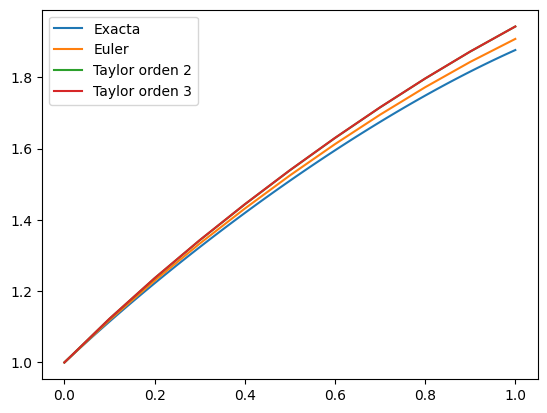

In [296]:
#gráfica de las soluciones
ts= np.linspace(0, 1, 100)
plt.plot(ti, exacta(ts), label='Exacta')
plt.plot(*euler(f, 0, 1, 1, 10), label='Euler')
plt.plot(*taylor2(f, df, 0, 1, 1, 10), label='Taylor orden 2')
plt.plot(*taylor3(f, df, df2, 0, 1, 1, 10), label='Taylor orden 3')
plt.legend()

dado que $h = (b-a)/N$ y b-a=1
entonces $N= 1/h$

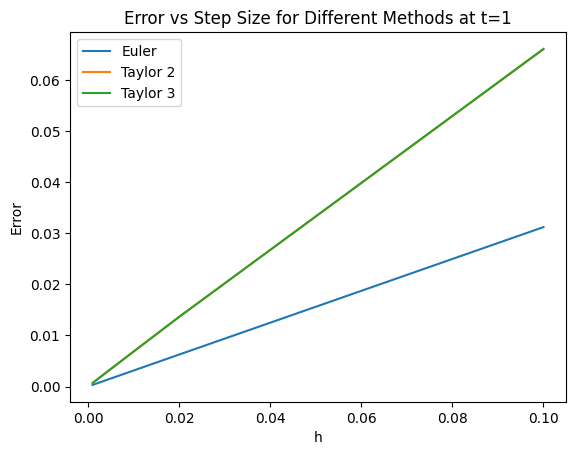

In [297]:

N_values = [10, 50, 100, 200, 500, 1000]


euler_errors = []
taylor2_errors = []
taylor3_errors = []

# Calcular errores para cada N
for N in N_values:
    ts_euler, sol_euler = euler(f, 0, 1, 1, N)
    ts_taylor2, sol_taylor2 = taylor2(f, df, 0, 1, 1, N)
    ts_taylor3, sol_taylor3 = taylor3(f, df, df2, 0, 1, 1, N)

    exacta1 = exacta(1)

    euler_errors.append(np.abs(sol_euler[-1] - exacta1))
    taylor2_errors.append(np.abs(sol_taylor2[-1] - exacta1))
    taylor3_errors.append(np.abs(sol_taylor3[-1] - exacta1))

# Graficar el error en función de h
plt.plot(1/np.array(N_values), euler_errors, label='Euler')
plt.plot(1/np.array(N_values), taylor2_errors, label='Taylor 2')
plt.plot(1/np.array(N_values), taylor3_errors, label='Taylor 3')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.title('Error vs Step Size for Different Methods at t=1')
plt.legend()
plt.show()

Tiene sentido el hecho de que a mayor h, mayor sea el error y que el método de euler sea elque tenga un mayor error. Sin embargo, hubiese esperado que la aproximación con el método de Taylor de tercer grado tuviera menor error que el de taylor de segundo grado.

# Calificación: 6.5

Creo que hay errores al tomar las derivadas, lo que afecta el resultado final.